# P5 - Duolingo Exploration Data Analysis and Visualization

Exploratory data analysis (EDA) is an approach for summarizing and visualizing the important characteristics of a dataset. It gives us more understanding of the data’s underlying structure and variables before feature engineering, formal modeling, model tuning, and other data analysis techniques. In this mini project, you will be introduced to some ways to explore data efficiently with different packages so that you can develop intuition about your dataset:
* Import and briefly check data with python data manipulation tools Pandas
* Get basic description of data, descriptive statistics, checking rows and columns.
* Time series analysis
* Simple predictive modeling
* Discover patterns in data by visualizing data with python data visualization packages sucha as Matplotlib, and Seaborn, or by using functions to compute the correlation between features.

### Dataset
* The dataset is from a language learning application on smartphones. 
* It contains user info, lexeme info and session info. We have already joined them into one single table for our analysis purpose.

### General Steps
 - Data preparation: load all needed dependencies and packages, setup plot style
 - Data Import: load data to pandas dataframe and check
 - Post questions: propose hypothesis based on your intuition
 - Visualization: Test you intuition and hypothesis using python visualization packages, such as Matplotlib.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import datetime as dt
import seaborn as sns
%matplotlib inline 

In [2]:
# avaliable plot styles
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


### 1. Import data

In [3]:
# The whole dataset is 1.3G.
# we only take a look at the first 1000000 rows.
df = pd.read_csv('learning_traces.csv', nrows=1000000)

In [4]:
df.head()

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct
0,1.0,1362076081,27649635,u:FO,de,en,76390c1350a8dac31186187e2fe1e178,lernt/lernen<vblex><pri><p3><sg>,6,4,2,2
1,0.5,1362076081,27649635,u:FO,de,en,7dfd7086f3671685e2cf1c1da72796d7,die/die<det><def><f><sg><nom>,4,4,2,1
2,1.0,1362076081,27649635,u:FO,de,en,35a54c25a2cda8127343f6a82e6f6b7d,mann/mann<n><m><sg><nom>,5,4,1,1
3,0.5,1362076081,27649635,u:FO,de,en,0cf63ffe3dda158bc3dbd55682b355ae,frau/frau<n><f><sg><nom>,6,5,2,1
4,1.0,1362076081,27649635,u:FO,de,en,84920990d78044db53c1b012f5bf9ab5,das/das<det><def><nt><sg><nom>,4,4,1,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
p_recall             1000000 non-null float64
timestamp            1000000 non-null int64
delta                1000000 non-null int64
user_id              1000000 non-null object
learning_language    1000000 non-null object
ui_language          1000000 non-null object
lexeme_id            1000000 non-null object
lexeme_string        1000000 non-null object
history_seen         1000000 non-null int64
history_correct      1000000 non-null int64
session_seen         1000000 non-null int64
session_correct      1000000 non-null int64
dtypes: float64(1), int64(6), object(5)
memory usage: 91.6+ MB


In [6]:
df.shape

(1000000, 12)

#### Please try to answer the following questions when you follow the data visualization procedures below:

 - How many users are there from every country?
 - How many different languages are being studied
 - Are there differences between users from different coutries
 - Time series analysis 
     - temporal behaviour of users
     - when do people study?
     - how often do they study
     - timestamp
 - Predictive modelling
     - corellations of p_recall with various features  

### 2. Exploration Data Analysis

In [7]:
df.dtypes

p_recall             float64
timestamp              int64
delta                  int64
user_id               object
learning_language     object
ui_language           object
lexeme_id             object
lexeme_string         object
history_seen           int64
history_correct        int64
session_seen           int64
session_correct        int64
dtype: object

### 2.1 Numerical data

In [8]:
set(df.dtypes.tolist())

{dtype('int64'), dtype('float64'), dtype('O')}

#### 1. Create a dataframe that only takes numerical data and show the head.

In [9]:
# df.select_dtypes()
num_feature=df.select_dtypes(['int64','float64'])
num_feature.head()

,p_recall,timestamp,delta,history_seen,history_correct,session_seen,session_correct
0,1.0,1362076081,27649635,6,4,2,2
1,0.5,1362076081,27649635,4,4,2,1
2,1.0,1362076081,27649635,5,4,1,1
3,0.5,1362076081,27649635,6,5,2,1
4,1.0,1362076081,27649635,4,4,1,1


#### 2. Draw histgrams to show distributions of all the numerical data.

/Users/xrli/anaconda3/lib/python3.6/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/xrli/anaconda3/lib/python3.6/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/xrli/anaconda3/lib/python3.6/site-packages/pandas/plotting/_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/Users/xrli/anaconda3/lib/python3.6/site-packages/pandas/plotting/_tools.py:3

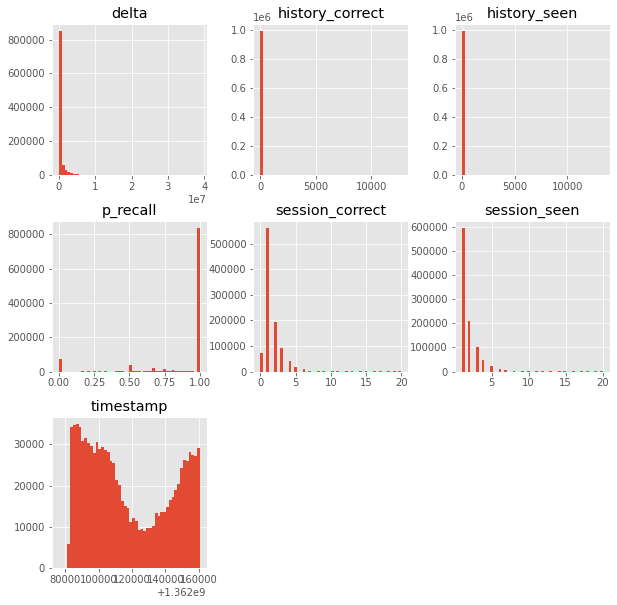

In [10]:
num_feature.hist(figsize=(10,10),bins=50)
plt.show()

#### Feature to feature relationship

- Plot all the numerical features in a pairplot will take us too much time and hard to interpret. 
- vs. try to see if some variables are linked between each other and then explain their relation with common sense.

#### 3. Compute pairwise correlation matrix of numerical columns and draw a heatmap using seaborn.

* Method of correlation:
    * pearson : standard correlation coefficient
    * kendall : Kendall Tau correlation coefficient
    * spearman : Spearman rank correlation

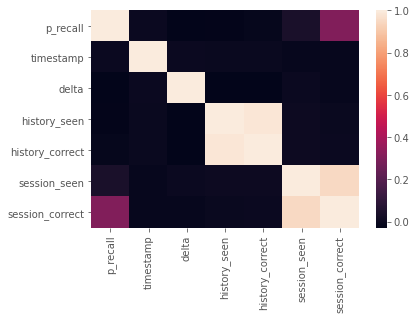

In [11]:
# corr(), sns.heatmap()
corr=num_feature.corr()
sns.heatmap(corr)

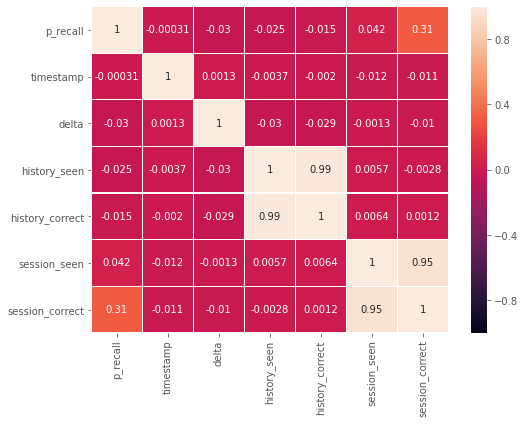

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(corr,
            vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 10}
            #cmap='viridis',square=True
           )

- histroy_seen/ histroy_correct, session_seen/session_correct, they both have pretty high correlation with each other.
- It verifies the common sense that the more you see, the higher probability you can do correctly. 

### 2.2 Categorical data

In [34]:
obj_feature=df.select_dtypes(['O'])
obj_feature.columns.values

array(['user_id', 'learning_language', 'ui_language', 'lexeme_id',
       'lexeme_string'], dtype=object)

#### a) Countries

#### 1. What are user interface languages? 

In [14]:
df.ui_language.unique()

array(['en', 'pt', 'es', 'it'], dtype=object)

#### 2. Do a value_counts() to see how popular each interface language is

In [15]:
df.ui_language.value_counts()

en    598123
es    298705
pt     72876
it     30296
Name: ui_language, dtype: int64

#### 3. Draw a pie plot to visualize user interface language distribution with percentage on it

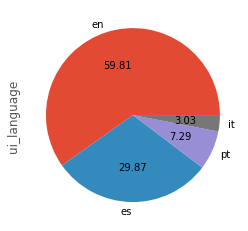

In [17]:
# hint: showing percentage, add autopct parameter
df.ui_language.value_counts().plot.pie(autopct='%.2f')

- En is the major ui_language and the Es is the second. 
- Only a few users are using it and pt as their ui_language.

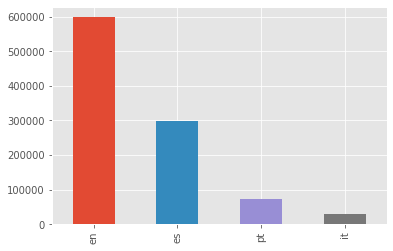

In [18]:
df.ui_language.value_counts().plot.bar()

#### 4. Draw a pie plot of languages that individuals are learning

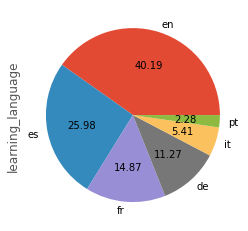

In [19]:
df.learning_language.value_counts().plot.pie(autopct='%.2f'
                                             #,explode=[0.1,0.1,0.1,0,0,0]
                                            )
#plt.title('learning_language')
#plt.show()

#### 5. Pie plot to visualize what languages being learned by people whose interface language is English

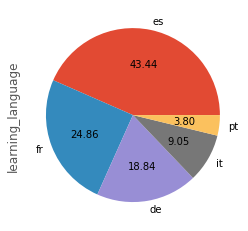

In [20]:
#plt.figure(figsize=(4, 6))
df[df.ui_language=='en'].learning_language.value_counts().plot.pie(autopct='%.2f')

Es and Fr and the two major language learned by the en ui users

#### 6. Let's see what languages being learned by people whose interface languages are English, Spanish, Italian, and Potuguese by subplot four pie plots

In [28]:
df.ui_language.unique()

array(['en', 'pt', 'es', 'it'], dtype=object)

In [22]:
df[df.ui_language == 'en']['learning_language'].value_counts().index

Index(['es', 'fr', 'de', 'it', 'pt'], dtype='object')

Text(0.5, 1.0, 'Italian')

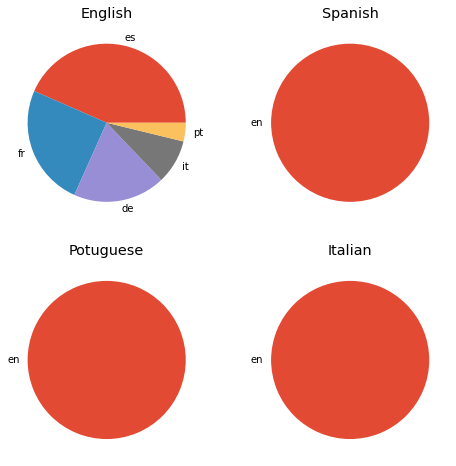

In [31]:
fig, ax = plt.subplots(2,2,figsize=(8,8))

ax[0,0].pie(df[df.ui_language == 'en']['learning_language'].value_counts(), 
             labels=df[df.ui_language == 'en']['learning_language'].value_counts().index)
ax[0,0].set_title('English')

ax[0,1].pie(df[df.ui_language == 'es']['learning_language'].value_counts(), 
             labels=df[df.ui_language == 'es']['learning_language'].value_counts().index)
ax[0,1].set_title('Spanish')

ax[1,0].pie(df[df.ui_language == 'pt']['learning_language'].value_counts(), 
             labels=df[df.ui_language == 'pt']['learning_language'].value_counts().index)
ax[1,0].set_title('Potuguese')

ax[1,1].pie(df[df.ui_language == 'it']['learning_language'].value_counts(), 
             labels=df[df.ui_language == 'it']['learning_language'].value_counts().index)
ax[1,1].set_title('Italian')

**Notes**: 
- It is quite straightforward that English speakers are learning other languages
- Spanish, Italian, Potuguses speakers are learning only English

#### Pie Chart
Pros: 
* Easy to See Large Disparities in Data
* Can Emphasize Data When There Are Only a Few Units
* Easy to see the domination if there's any

Cons:
* When you have 3+ slices, hard to tell the pct of each
* can't tell the difference in pct if there's little difference
* Unhelpful When Observing Trends Over Time

#### b) Users Activity patterns

In [41]:
df.head()

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct
0,1.0,1362076081,27649635,u:FO,de,en,76390c1350a8dac31186187e2fe1e178,lernt/lernen<vblex><pri><p3><sg>,6,4,2,2
1,0.5,1362076081,27649635,u:FO,de,en,7dfd7086f3671685e2cf1c1da72796d7,die/die<det><def><f><sg><nom>,4,4,2,1
2,1.0,1362076081,27649635,u:FO,de,en,35a54c25a2cda8127343f6a82e6f6b7d,mann/mann<n><m><sg><nom>,5,4,1,1
3,0.5,1362076081,27649635,u:FO,de,en,0cf63ffe3dda158bc3dbd55682b355ae,frau/frau<n><f><sg><nom>,6,5,2,1
4,1.0,1362076081,27649635,u:FO,de,en,84920990d78044db53c1b012f5bf9ab5,das/das<det><def><nt><sg><nom>,4,4,1,1


#### 1. Let's see users activity in session by doing a value counts and do a summary statistics

In [39]:
# hint: summary statistics use describe() function 
df.user_id.value_counts().head()

u:ia1J    2041
u:bcH_    1531
u:eMgB    1233
u:wpZ     1230
u:gp3v    1037
Name: user_id, dtype: int64

In [40]:
df.user_id.value_counts().describe()

count    20204.000000
mean        49.495149
std         74.911279
min          1.000000
25%          8.000000
50%         26.000000
75%         59.000000
max       2041.000000
Name: user_id, dtype: float64

#### 2. Compute the duration of dataset

In [49]:
duration=(df.timestamp.max()-df.timestamp.min())/3600
print ("Duration of the dataset is: ",duration,"hours")

Duration of the dataset is:  23.500555555555554 hours


#### Boxplots

#### 3. Compare activity levels for people with different 4 user interface languages by drawing boxplots

In [50]:
# hint: df[df.ui_language == 'en']['user_id'].value_counts()/duration

session_seen

p_recall             float64
timestamp              int64
delta                  int64
user_id               object
learning_language     object
ui_language           object
lexeme_id             object
lexeme_string         object
history_seen           int64
history_correct        int64
session_seen           int64
session_correct        int64
dtype: object

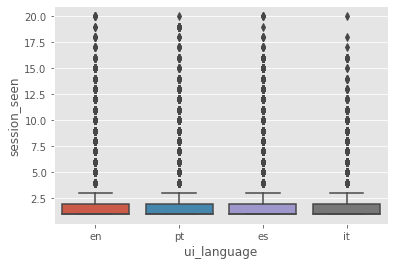

In [51]:
sns.boxplot(x='ui_language',y='session_seen',data=df)

#### 4. Do the same thing but setting ylim to 0-10, which plot would be seen more clearly

####  5. Another way to zoom in instead of setting ylim is to take a log scale on the boxplot

In [ ]:
# hint: log scale on y



## Regression and predictive tasks

In [ ]:
df.head()

#### 1. Scatter plot the relation between session_seen and p_recall

#### 2. Scatter plot the same distribution with log scale. 

#### 3. Goupby session_seen and take aveage on it as x, and scatter plot relation with p_recall as y

In [ ]:
# hint: use groupby(), and mean() functions



#### 4. Goupby history_seen and take aveage on it as x, and scatter plot relation with p_recall as y

#### 5. Scatter plot the relation history_seen and p_recall when session_seen is greater than 5

In [ ]:
# Type you answer below 


#### 6. Hexbin plot the relation between history_seen and p_recal with log scale

In [ ]:
# hint: hexbin()



#### 7. Create a dataframe with user_id and user_activity based on user_id index

In [ ]:
# create an empty dataframe and set index to user_id



#### 8. Merge dataframe a onto original dataframe

In [ ]:
# hint: merge(), pay attention to how to merge(inner, outer....)



#### 9. Get summary statistics of p_recall when user_activity is less than 8 and greater than 59 respectively

#### 10. Hexbin plot the relation between delta and p_recall with log scale

#### 11. Scatter plot relation between user_activity and delta

#### 12. Hexbin plot the relation between user_activity and delta with log scale

## Temporal patterns and Time Series

#### 1. Plot the general all users activity pattern to see what time people are pretty active during a day

In [ ]:
# You can use datetime library to convert timestamp to actual datetime
dt.datetime.fromtimestamp(df.timestamp.min())

#### 2. Visualize each interface language users daily activity pattern onto a single plot. 

In [ ]:
# hint: use rolling window here

